# WGCNA (Weighted gene co-expression network analysis) analysis
Weighted gene co-expression network analysis (WGCNA) is a systems biology approach to characterize gene association patterns between different samples and can be used to identify highly synergistic gene sets and identify candidate biomarker genes or therapeutic targets based on the endogeneity of the gene sets and the association between the gene sets and the phenotype.

Paper: [WGCNA: an R package for weighted correlation network analysis](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-559#Sec21)

Narges Rezaie, Farilie Reese, Ali Mortazavi, PyWGCNA: a Python package for weighted gene co-expression network analysis, Bioinformatics, Volume 39, Issue 7, July 2023, btad415, https://doi.org/10.1093/bioinformatics/btad415

Code: Reproduce by Python. Raw is http://www.genetics.ucla.edu/labs/horvath/CoexpressionNetwork/Rpackages/WGCNA

Colab_Reproducibility：https://colab.research.google.com/drive/1EbP-Tq1IwYO9y1_-zzw23XlPbzrxP0og?usp=sharing

Here, you will be briefly guided through the basics of how to use omicverse to perform wgcna anlysis. Once you are set

In [1]:
import scanpy as sc
import omicverse as ov
import matplotlib.pyplot as plt
ov.plot_set()

2024-09-22 19:56:21.161933: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 19:56:21.174958: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 19:56:21.178942: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-22 19:56:21.878347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.7, Tutorials: https://omicverse.readthedocs.io/
All dependencies are satisfied.


## Load the data
The analysis is based on the in-built WGCNA tutorial data. All the data can be download from https://github.com/mortazavilab/PyWGCNA/tree/main/tutorials/5xFAD_paper

In [2]:
import pandas as pd
data=ov.utils.read('data/5xFAD_paper/expressionList.csv',
                           index_col=0)
data.head()

ENSMUSG00000000003  ENSMUSG00000000028  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                 0.0                1.90   
X4mo_cortex_F_5xFADHEMI_431                 0.0                1.10   
X4mo_cortex_F_5xFADHEMI_433                 0.0                1.18   
X4mo_cortex_F_5xFADHEMI_434                 0.0                2.18   
X4mo_cortex_F_5xFADHEMI_511                 0.0                1.50   

                             ENSMUSG00000000031  ENSMUSG00000000037  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.00                0.13   
X4mo_cortex_F_5xFADHEMI_431                0.06                0.07   
X4mo_cortex_F_5xFADHEMI_433                0.07                0.13   
X4mo_cortex_F_5xFADHEMI_434                0.00                0.07   
X4mo_cortex_F_5xFADHEMI_511                0.10                0.14   

                             ENSMUSG00000000049  ENSMUSG00000000056  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.43               22.37   
X4mo_cortex_F_5xFADHEMI_431                0.18               16.99   
X4mo_cortex_F_5xFADHEMI_433                1.90               20.37   
X4mo_cortex_F_5xFADHEMI_434                0.31               17.98   
X4mo_cortex_F_5xFADHEMI_511                0.53               18.35   

                             ENSMUSG00000000058  ENSMUSG00000000078  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430               24.24               19.32   
X4mo_cortex_F_5xFADHEMI_431               24.69               23.88   
X4mo_cortex_F_5xFADHEMI_433               28.06               21.33   
X4mo_cortex_F_5xFADHEMI_434               21.46               15.06   
X4mo_cortex_F_5xFADHEMI_511               20.18               18.66   

                             ENSMUSG00000000085  ENSMUSG00000000088  ...  \
sample_id                                                            ...   
X4mo_cortex_F_5xFADHEMI_430               33.41              620.45  ...   
X4mo_cortex_F_5xFADHEMI_431               31.40              705.73  ...   
X4mo_cortex_F_5xFADHEMI_433               32.14              699.50  ...   
X4mo_cortex_F_5xFADHEMI_434               27.60              639.95  ...   
X4mo_cortex_F_5xFADHEMI_511               26.43              640.55  ...   

                             ENSMUSG00000118383  ENSMUSG00000118384  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.75                 0.0   
X4mo_cortex_F_5xFADHEMI_431                0.67                 0.0   
X4mo_cortex_F_5xFADHEMI_433                0.91                 0.0   
X4mo_cortex_F_5xFADHEMI_434                0.11                 0.0   
X4mo_cortex_F_5xFADHEMI_511                0.64                 0.0   

                             ENSMUSG00000118385  ENSMUSG00000118386  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                0.00                0.00   
X4mo_cortex_F_5xFADHEMI_431                0.55                0.43   
X4mo_cortex_F_5xFADHEMI_433                0.00                0.19   
X4mo_cortex_F_5xFADHEMI_434                0.00                0.00   
X4mo_cortex_F_5xFADHEMI_511                1.38                0.00   

                             ENSMUSG00000118387  ENSMUSG00000118388  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_431                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_433                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_434                 0.0                 0.0   
X4mo_cortex_F_5xFADHEMI_511                 0.0                 0.0   

          

In [3]:
from statsmodels import robust #import package
gene_mad=data.apply(robust.mad) #use function to calculate MAD
data=data.T
data=data.loc[gene_mad.sort_values(ascending=False).index[:2000]]
data.head()

sample_id           X4mo_cortex_F_5xFADHEMI_430  X4mo_cortex_F_5xFADHEMI_431  \
ENSMUSG00000099250                     38274.46                     45547.41   
ENSMUSG00000099021                     38274.46                     36885.85   
ENSMUSG00000064356                     13048.33                     13904.76   
ENSMUSG00000102070                      6323.94                      6086.47   
ENSMUSG00000064357                     24524.58                     25345.63   

sample_id           X4mo_cortex_F_5xFADHEMI_433  X4mo_cortex_F_5xFADHEMI_434  \
ENSMUSG00000099250                     40835.79                     35162.62   
ENSMUSG00000099021                     46409.95                     41388.72   
ENSMUSG00000064356                     12283.33                     10654.36   
ENSMUSG00000102070                      6421.64                      4967.26   
ENSMUSG00000064357                     27358.45                     22902.01   

sample_id           X4mo_cortex_F_5xFADHEMI_511  X4mo_cortex_F_5xFADWT_330  \
ENSMUSG00000099250                     52371.17                   42761.19   
ENSMUSG00000099021                     54608.70                   38940.59   
ENSMUSG00000064356                     11040.40                   10112.12   
ENSMUSG00000102070                      6173.10                    6186.12   
ENSMUSG00000064357                     20973.69                   22306.31   

sample_id           X4mo_cortex_F_5xFADWT_331  X4mo_cortex_F_5xFADWT_432  \
ENSMUSG00000099250                   46116.59                   43595.89   
ENSMUSG00000099021                   52898.07                   32184.16   
ENSMUSG00000064356                    9930.95                   14263.90   
ENSMUSG00000102070                    4916.20                    7770.57   
ENSMUSG00000064357                   23962.79                   25748.21   

sample_id           X4mo_cortex_F_5xFADWT_507  X4mo_cortex_F_5xFADWT_518  ...  \
ENSMUSG00000099250                   50531.39                   46891.88  ...   
ENSMUSG00000099021                   43387.97                   42442.50  ...   
ENSMUSG00000064356                   14124.68                   10331.52  ...   
ENSMUSG00000102070                    5725.27                    5272.50  ...   
ENSMUSG00000064357                   23760.62                   20068.35  ...   

sample_id           X18mo_hipp_M_5xFADHEMI_567  X18mo_hipp_M_5xFADHEMI_617  \
ENSMUSG00000099250                    36696.94                    59031.53   
ENSMUSG00000099021                    36696.94                    59031.53   
ENSMUSG00000064356                    26344.45                    28834.11   
ENSMUSG00000102070                       16.31                        0.01   
ENSMUSG00000064357                    22878.69                    25651.64   

sample_id           X18mo_hipp_M_5xFADHEMI_627  X18mo_hipp_M_5xFADHEMI_640  \
ENSMUSG00000099250                    44038.38                    39537.58   
ENSMUSG00000099021                    37772.09                    33995.79   
ENSMUSG00000064356                    26020.02                    29152.34   
ENSMUSG00000102070                        0.00                        0.00   
ENSMUSG00000064357                    22606.07                    25008.25   

sample_id           X18mo_hipp_M_5xFADHEMI_786  X18mo_hipp_M_5xFADWT_301  \
ENSMUSG00000099250                    43637.47                  30459.36   
ENSMUSG00000099021                    28730.09                  30459.36   
ENSMUSG00000064356                    24033.60                  33013.99   
ENSMUSG00000102070                        0.00                      0.00   
ENSMUSG00000064357                    21907.32                  28164.62   

sample_id           X18mo_hipp_M_5xFADWT_566  X18mo_hipp_M_5xFADWT_641  \
ENSMUSG00000099250                  12742.01                  32803.24   
ENSMUSG00000099021                  12742.01                  32803.24   
ENSMUSG0

In [5]:
#import PyWGCNA
pyWGCNA_5xFAD = ov.bulk.pyWGCNA(name='5xFAD_2k', 
                              species='mus musculus', 
                              geneExp=data.T, 
                              outputPath='',
                              save=True)
pyWGCNA_5xFAD.geneExpr.to_df().head(5)

Saving data to be True, checking requirements ...


ENSMUSG00000099250  ENSMUSG00000099021  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430            38274.46            38274.46   
X4mo_cortex_F_5xFADHEMI_431            45547.41            36885.85   
X4mo_cortex_F_5xFADHEMI_433            40835.79            46409.95   
X4mo_cortex_F_5xFADHEMI_434            35162.62            41388.72   
X4mo_cortex_F_5xFADHEMI_511            52371.17            54608.70   

                             ENSMUSG00000064356  ENSMUSG00000102070  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430            13048.33             6323.94   
X4mo_cortex_F_5xFADHEMI_431            13904.76             6086.47   
X4mo_cortex_F_5xFADHEMI_433            12283.33             6421.64   
X4mo_cortex_F_5xFADHEMI_434            10654.36             4967.26   
X4mo_cortex_F_5xFADHEMI_511            11040.40             6173.10   

                             ENSMUSG00000064357  ENSMUSG00000106106  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430            24524.58             4382.70   
X4mo_cortex_F_5xFADHEMI_431            25345.63             6045.83   
X4mo_cortex_F_5xFADHEMI_433            27358.45             3611.95   
X4mo_cortex_F_5xFADHEMI_434            22902.01             5336.76   
X4mo_cortex_F_5xFADHEMI_511            20973.69             7221.82   

                             ENSMUSG00000101111  ENSMUSG00000064354  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430            14720.04             5719.72   
X4mo_cortex_F_5xFADHEMI_431            15258.06             5484.94   
X4mo_cortex_F_5xFADHEMI_433            16391.84             6015.36   
X4mo_cortex_F_5xFADHEMI_434            14207.71             6440.73   
X4mo_cortex_F_5xFADHEMI_511            13444.75             4451.85   

                             ENSMUSG00000064339  ENSMUSG00000064337  ...  \
sample_id                                                            ...   
X4mo_cortex_F_5xFADHEMI_430             5697.65             5512.88  ...   
X4mo_cortex_F_5xFADHEMI_431             6660.83             6870.51  ...   
X4mo_cortex_F_5xFADHEMI_433             6529.01             6843.43  ...   
X4mo_cortex_F_5xFADHEMI_434             5287.13             5244.33  ...   
X4mo_cortex_F_5xFADHEMI_511             5671.34             6160.46  ...   

                             ENSMUSG00000032407  ENSMUSG00000001383  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430               16.39              117.19   
X4mo_cortex_F_5xFADHEMI_431               19.84              127.13   
X4mo_cortex_F_5xFADHEMI_433               16.08              118.16   
X4mo_cortex_F_5xFADHEMI_434               14.58              113.54   
X4mo_cortex_F_5xFADHEMI_511               17.60              116.65   

                             ENSMUSG00000026965  ENSMUSG00000021423  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430               68.52               43.05   
X4mo_cortex_F_5xFADHEMI_431               60.90               39.82   
X4mo_cortex_F_5xFADHEMI_433               67.46               50.15   
X4mo_cortex_F_5xFADHEMI_434               59.20               31.26   
X4mo_cortex_F_5xFADHEMI_511               61.78               28.27   

                             ENSMUSG00000033006  ENSMUSG00000060371  \
sample_id                                                             
X4mo_cortex_F_5xFADHEMI_430               12.42               43.30   
X4mo_cortex_F_5xFADHEMI_431               25.63               51.73   
X4mo_cortex_F_5xFADHEMI_433               28.76               60.93   
X4mo_cortex_F_5xFADHEMI_434               34.34               67.71   
X4mo_cortex_F_5xFADHEMI_511               34.48               66.95   

          

## Pre-processing workflow

PyWGCNA allows you to easily preproces the data including removing genes with too many missing values or lowly-expressed genes across samples (by default we suggest to remove genes without that are expressed below 1 TPM) and removing samples with too many missing values. Keep in your mind that these options can be adjusted by changing `TPMcutoff` and `cut`

Pre-processing...
	Detecting genes and samples with too many missing values...
	Done pre-processing..



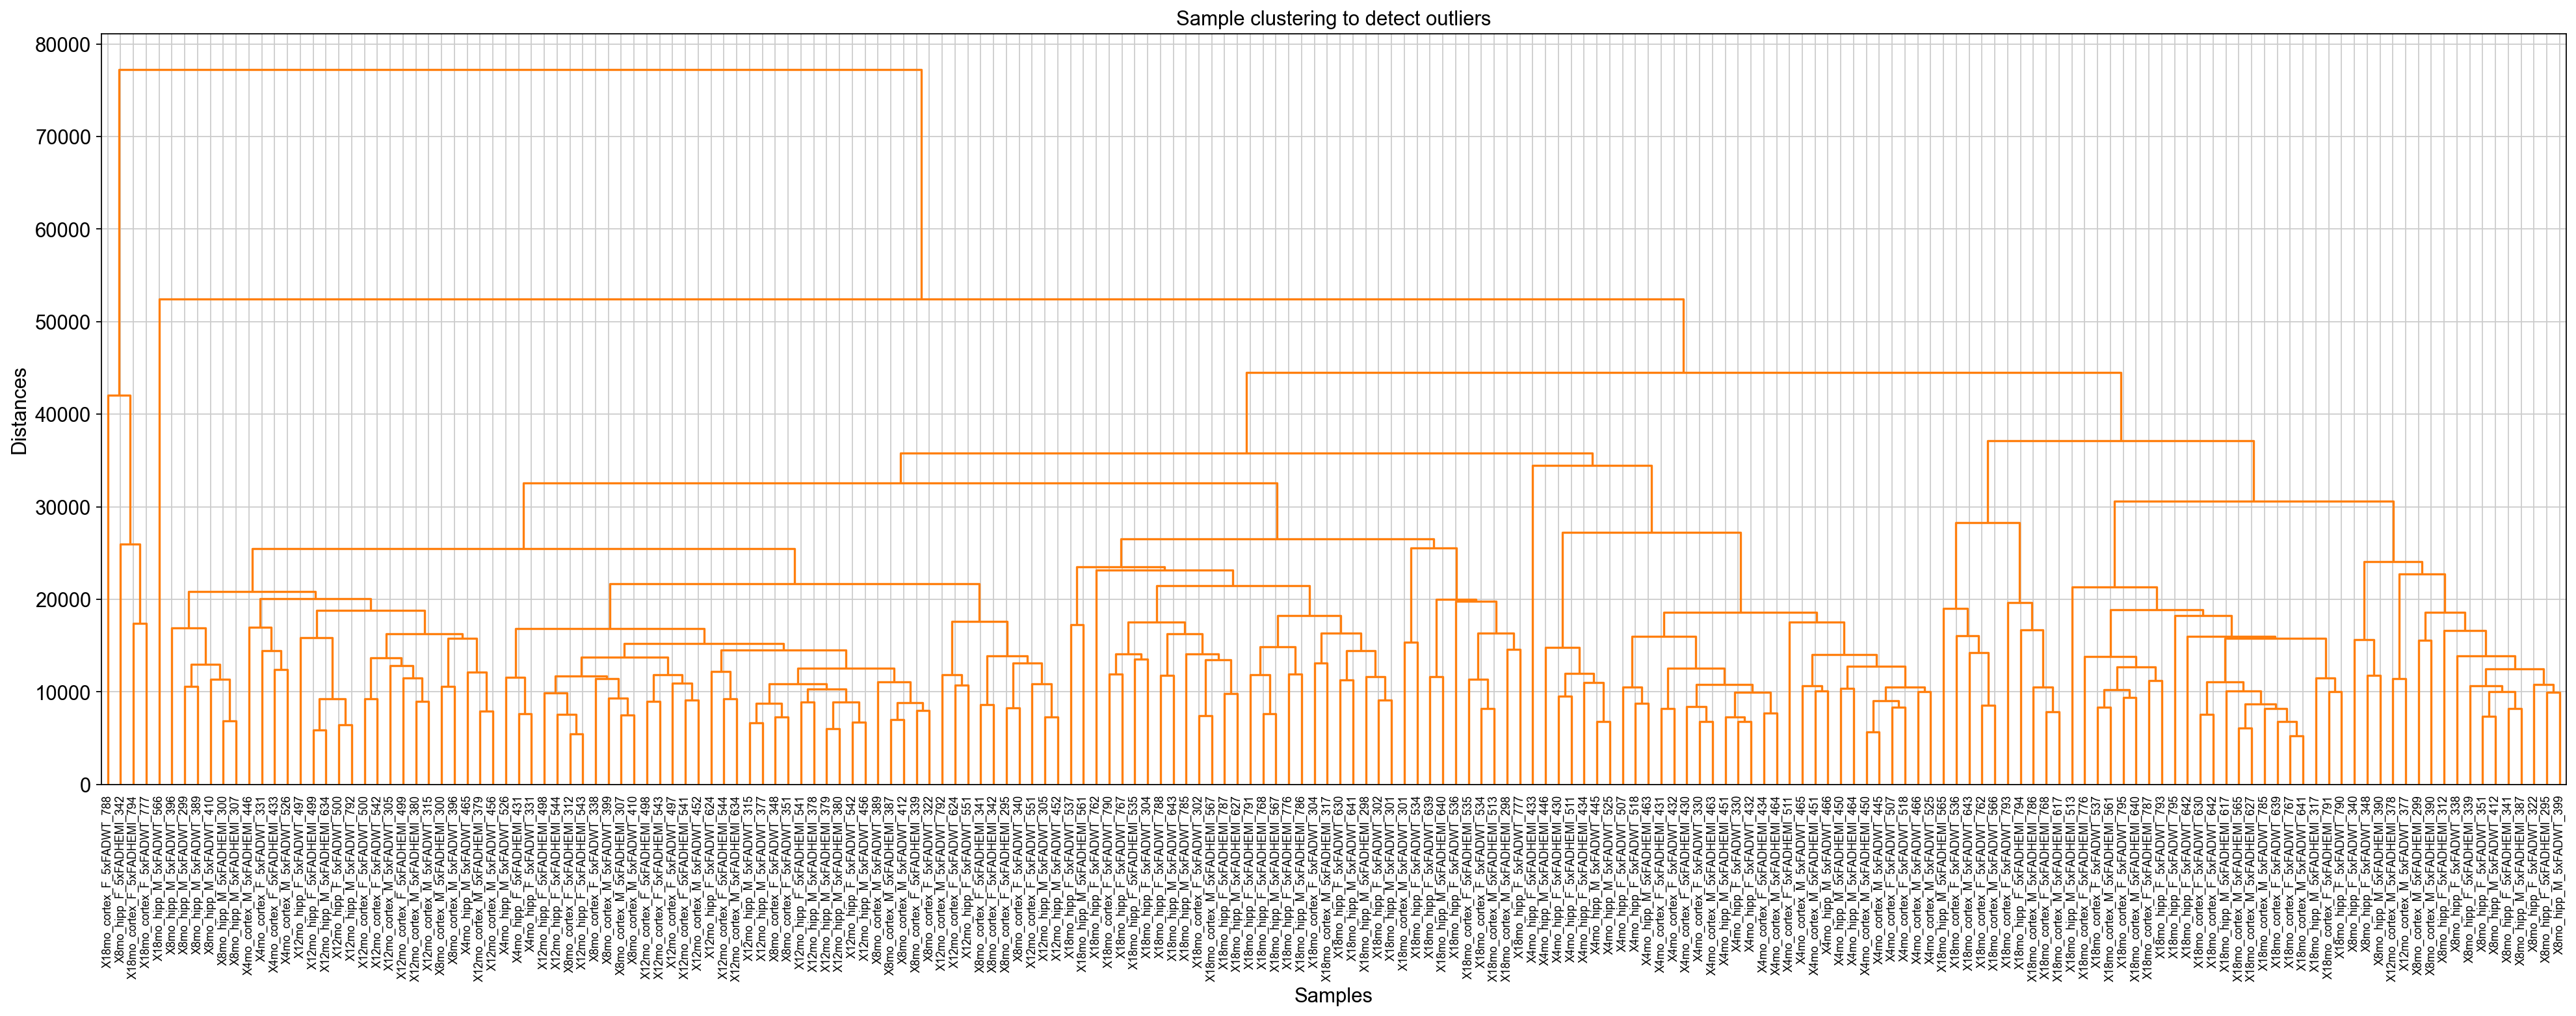

In [6]:
pyWGCNA_5xFAD.preprocess()

## Construction of the gene network and identification of modules

PyWGCNA compresses all the steps of network construction and module detection in one function called `findModules` which performs the following steps:
1. Choosing the soft-thresholding power: analysis of network topology
2. Co-expression similarity and adjacency
3. Topological Overlap Matrix (TOM)
4. Clustering using TOM
5. Merging of modules whose expression profiles are very similar

In this tutorial, we will perform the analysis step by step.

Run pyWGCNA...
pickSoftThreshold: calculating connectivity for given powers...
will use block size  2000
    Power  SFT.R.sq     slope truncated R.sq     mean(k)   median(k)  \
0       1  0.475634  0.858089       0.916615  384.051226   365.47651   
1       2  0.024359  -0.12182       0.744927  187.032023  156.365157   
2       3  0.467144 -0.639564       0.811331  107.526153   82.679754   
3       4  0.700621 -0.901753       0.891559   68.076955   49.542257   
4       5  0.822088  -1.08531       0.951344   45.940993   31.233385   
5       6  0.865329 -1.199273       0.964283   32.453619   21.109319   
6       7  0.891881  -1.25357       0.981805    23.73344   14.598084   
7       8  0.902572 -1.323021        0.98498   17.836142   10.342337   
8       9  0.902377 -1.373948       0.978787    13.70429    7.363482   
9      10  0.914352 -1.389264       0.986473   10.725253    5.465437   
10     11  0.913148 -1.411199       0.985258    8.525814    4.015487   
11     13  0.914821 -1.453348  

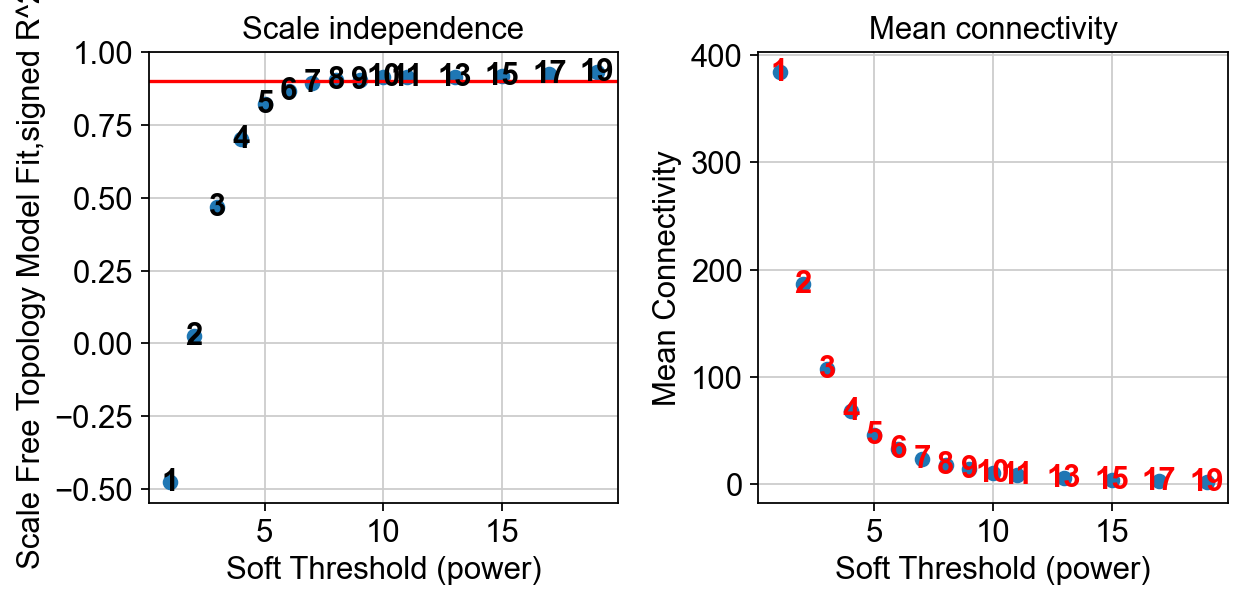

In [7]:
pyWGCNA_5xFAD.calculate_soft_threshold()

In [8]:
pyWGCNA_5xFAD.calculating_adjacency_matrix()

calculating adjacency matrix ...
	Done..



In [9]:
pyWGCNA_5xFAD.calculating_TOM_similarity_matrix()

calculating TOM similarity matrix ...
	Done..



## Building a network of co-expressions

We use the dynamicTree to build the co-expressions module basing TOM matrix

Going through the merge tree...
..cutHeight not given, setting it to 0.9970417414225616  ===>  99% of the (truncated) height range in dendro.
..done.
Calculating 13 module eigengenes in given set...
	Done..

mergeCloseModules: Merging modules whose distance is less than 0.2
fixDataStructure: data is not a Dictionary: converting it into one.
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 13 module eigengenes in given set...
	Done..

  Calculating new MEs...
multiSetMEs: Calculating module MEs.
  Working on set 1 ...
Calculating 13 module eigengenes in given set...
	Done..

Calculating 13 module eigengenes in given set...
	Done..

fixDataStructure: data is not a Dictionary: converting it into one.
orderMEs: order not given, calculating using given set 0


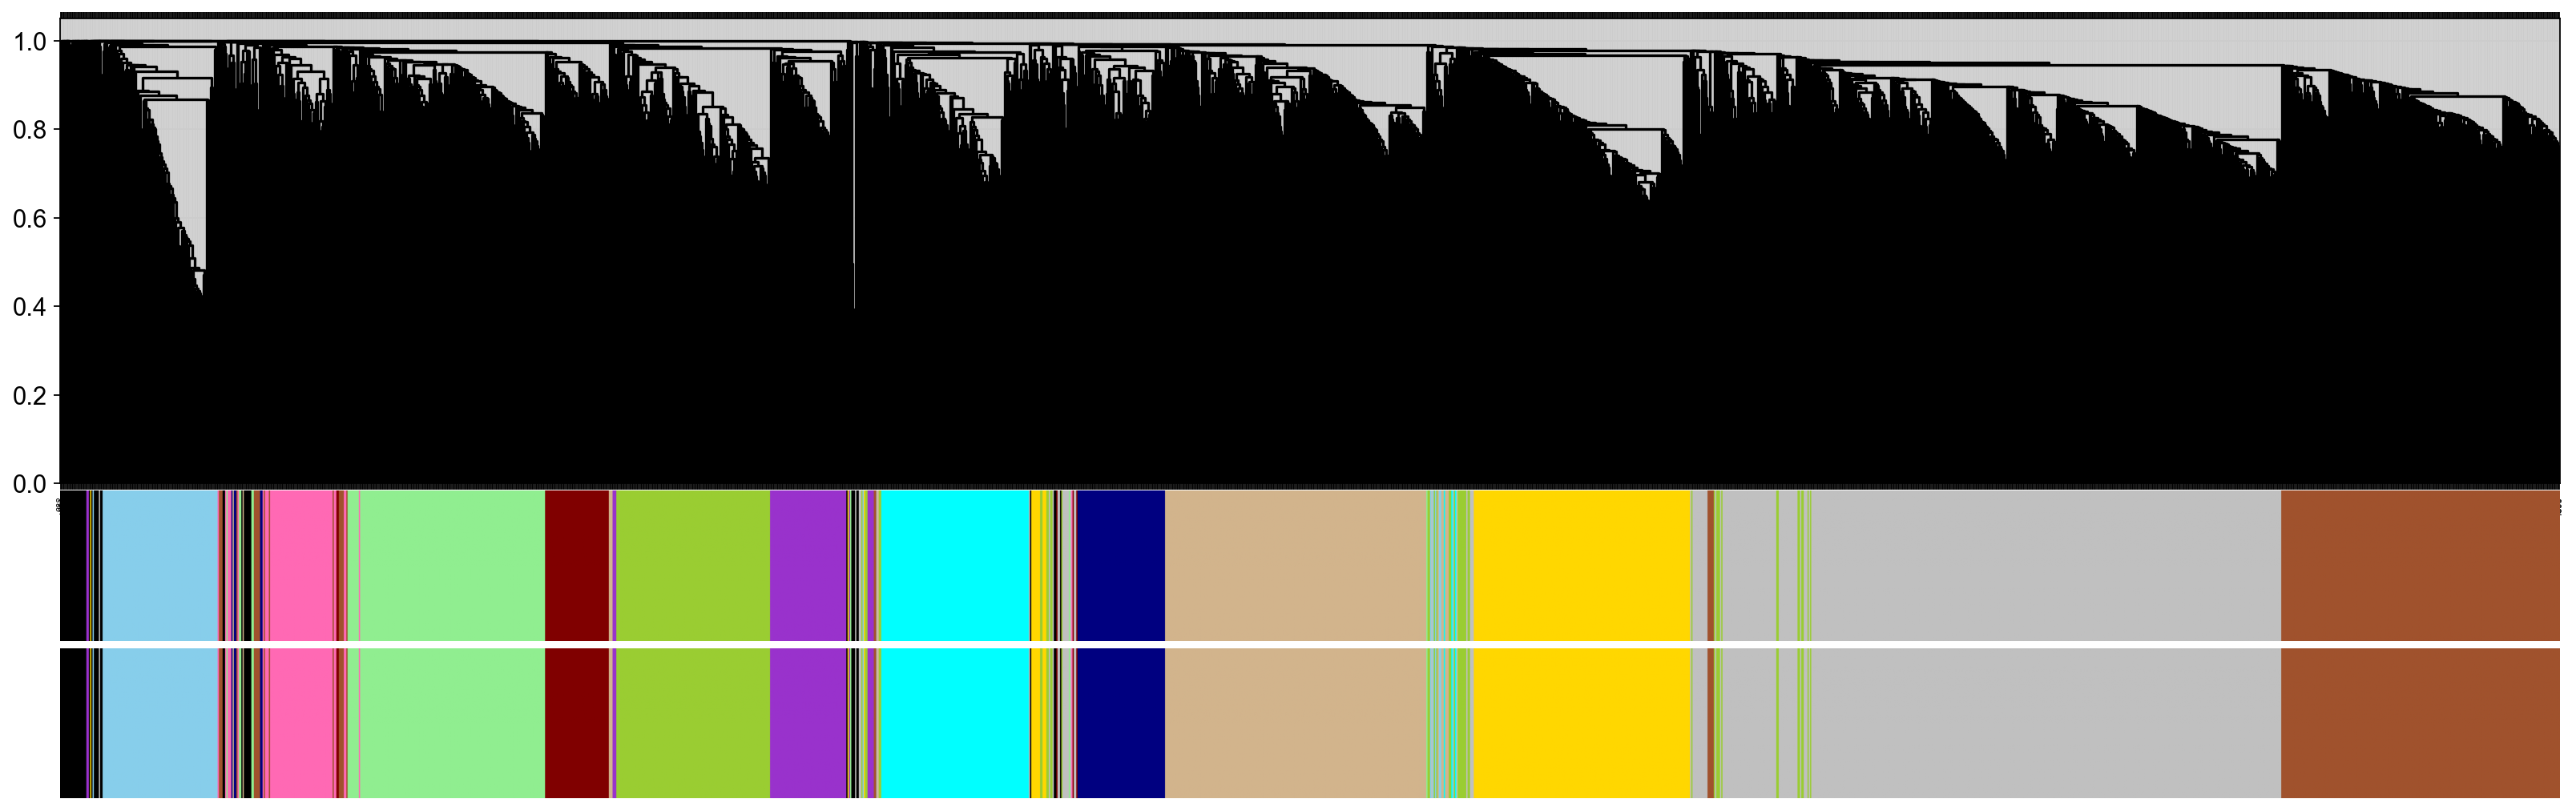

In [10]:
pyWGCNA_5xFAD.calculate_geneTree()
pyWGCNA_5xFAD.calculate_dynamicMods(kwargs_function={'cutreeHybrid': {'deepSplit': 2, 'pamRespectsDendro': False}})
pyWGCNA_5xFAD.calculate_gene_module(kwargs_function={'moduleEigengenes': {'softPower': 8}})

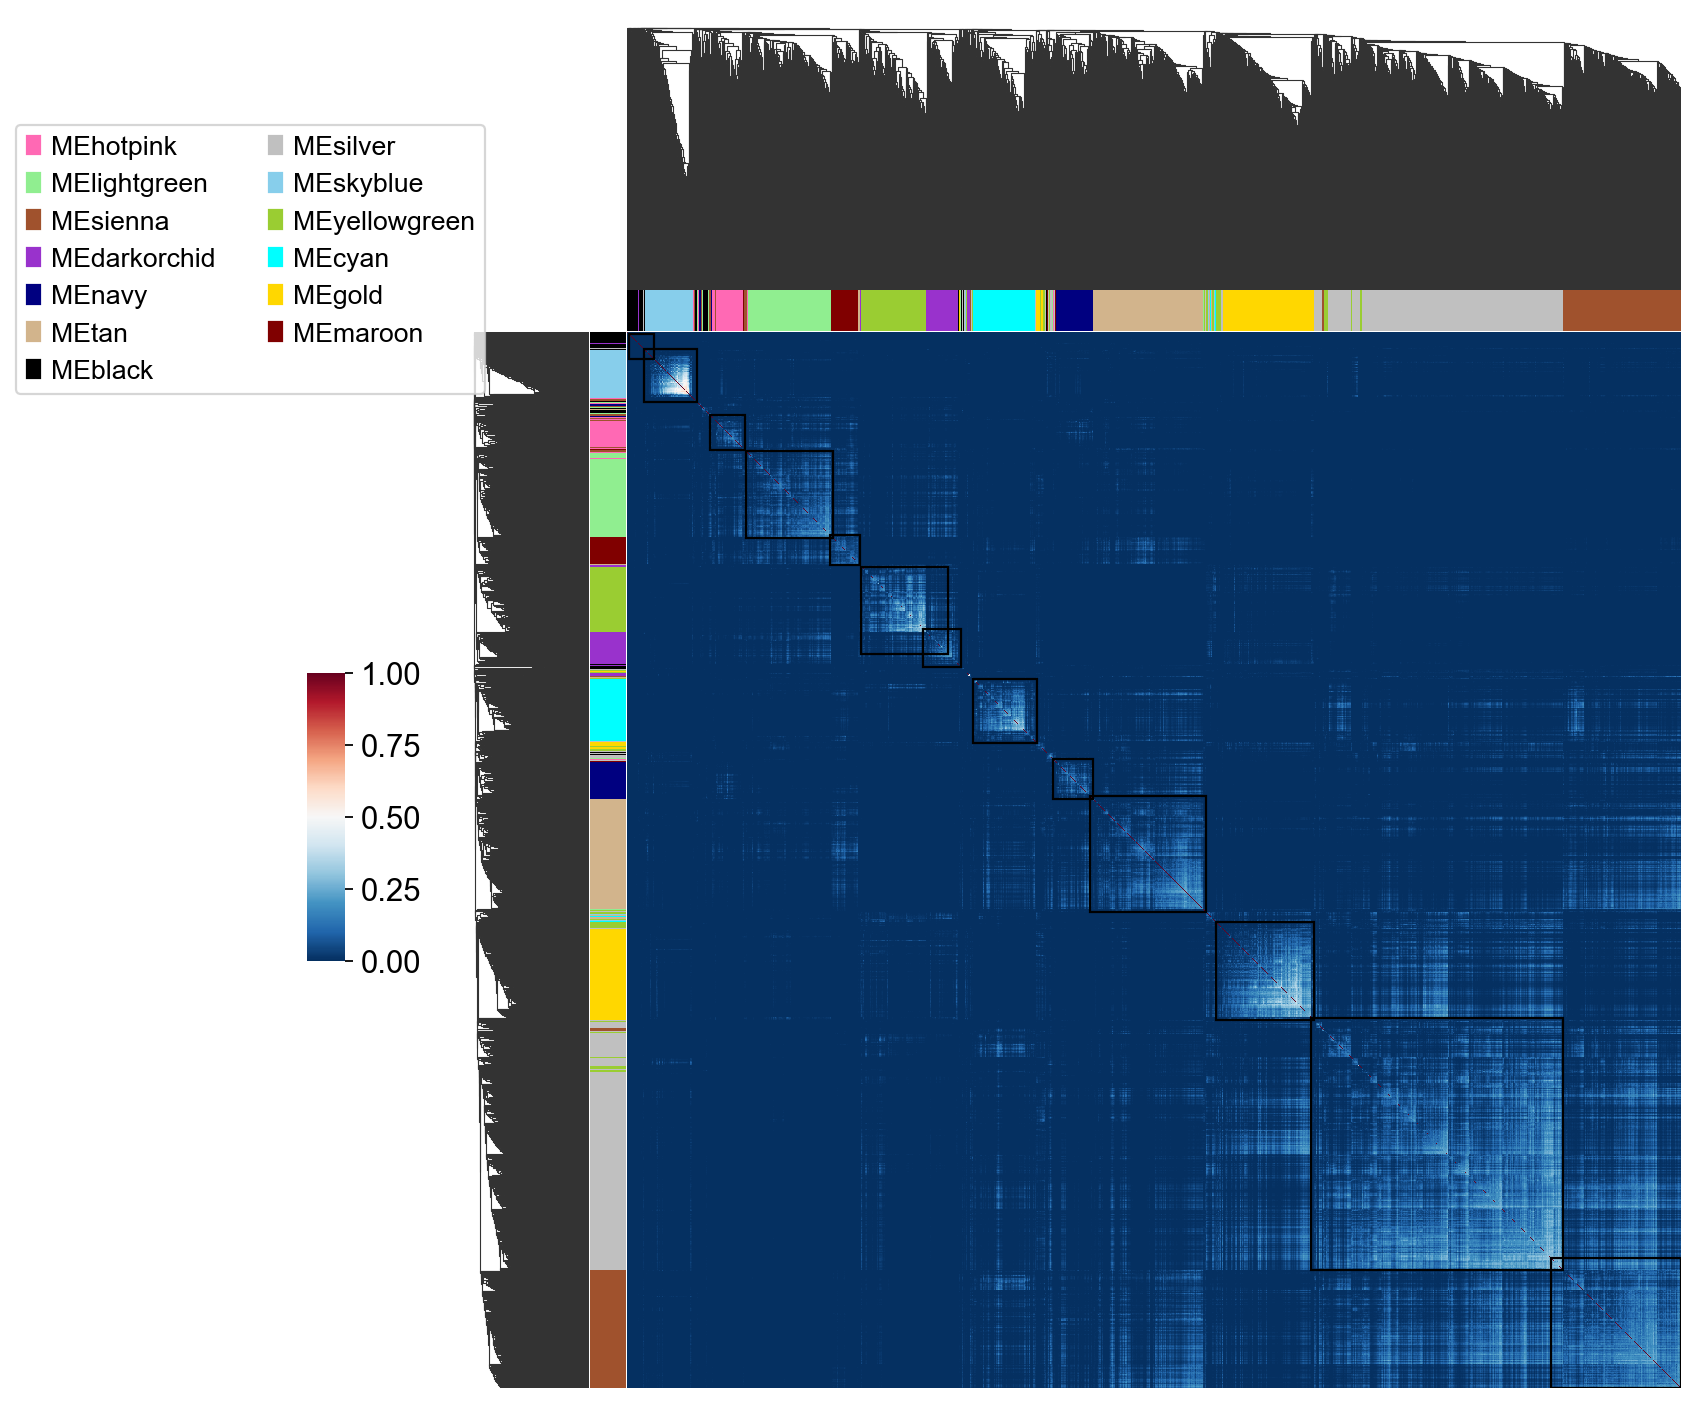

In [11]:
pyWGCNA_5xFAD.plot_matrix(save=False)

## Saving and loading your PyWGCNA
You can save or load your PyWGCNA object with the `saveWGCNA()` or `readWGCNA()` functions respectively.

In [12]:
pyWGCNA_5xFAD.saveWGCNA()

Saving WGCNA as 5xFAD_2k.p


In [2]:
pyWGCNA_5xFAD=ov.bulk.readWGCNA('5xFAD_2k.p')

Reading 5xFAD_2k WGCNA done!


In [14]:
pyWGCNA_5xFAD.mol.head()

ivl  module                name dynamo_color module_color
0   682       0  ENSMUSG00000065947        black        black
1   111       0  ENSMUSG00000077990        black        black
2  1124       0  ENSMUSG00000096768        black        black
3  1663       0  ENSMUSG00000110669        black        black
4    24       0  ENSMUSG00000105145        black        black

In [15]:
pyWGCNA_5xFAD.datExpr.var.head()

dynamicColors moduleColors  moduleLabels
ENSMUSG00000099250       hotpink      hotpink             4
ENSMUSG00000099021       hotpink      hotpink             4
ENSMUSG00000064356    lightgreen   lightgreen             5
ENSMUSG00000102070        sienna       sienna             8
ENSMUSG00000064357    darkorchid   darkorchid             2

## Sub co-expression module

Sometimes we are interested in a gene, or a module of a pathway, and we need to extract the sub-modules of the gene for analysis and mapping. For example, we have selected two modules, 6 and 12, as sub-modules for analysis

In [13]:
sub_mol=pyWGCNA_5xFAD.get_sub_module(['gold','lightgreen'],
                            mod_type='module_color')
sub_mol.head(),sub_mol.shape

(      ivl  module                name dynamo_color module_color
 24     23       4  ENSMUSG00000015090         gold         gold
 133  1694       6  ENSMUSG00000006412   lightgreen   lightgreen
 143    83       6  ENSMUSG00000060143   lightgreen   lightgreen
 144   829       6  ENSMUSG00000020857   lightgreen   lightgreen
 153   274       6  ENSMUSG00000080921   lightgreen   lightgreen,
 (351, 5))

We found a total of 151 genes for 'gold' and 'lightgreen'. Next, we used the scale-free network constructed earlier, with the threshold set to 0.95, to construct a gene correlation network graph for modules 'gold' and 'lightgreen'

In [17]:
G_sub=pyWGCNA_5xFAD.get_sub_network(mod_list=['lightgreen'],
                            mod_type='module_color',correlation_threshold=0.2)
G_sub

In [18]:
len(G_sub.edges())

137

pyWGCNA provides a simple visualisation function `plot_sub_network` to visualise the gene-free network of our interest.

(<Figure size 640x640 with 1 Axes>, <AxesSubplot: >)

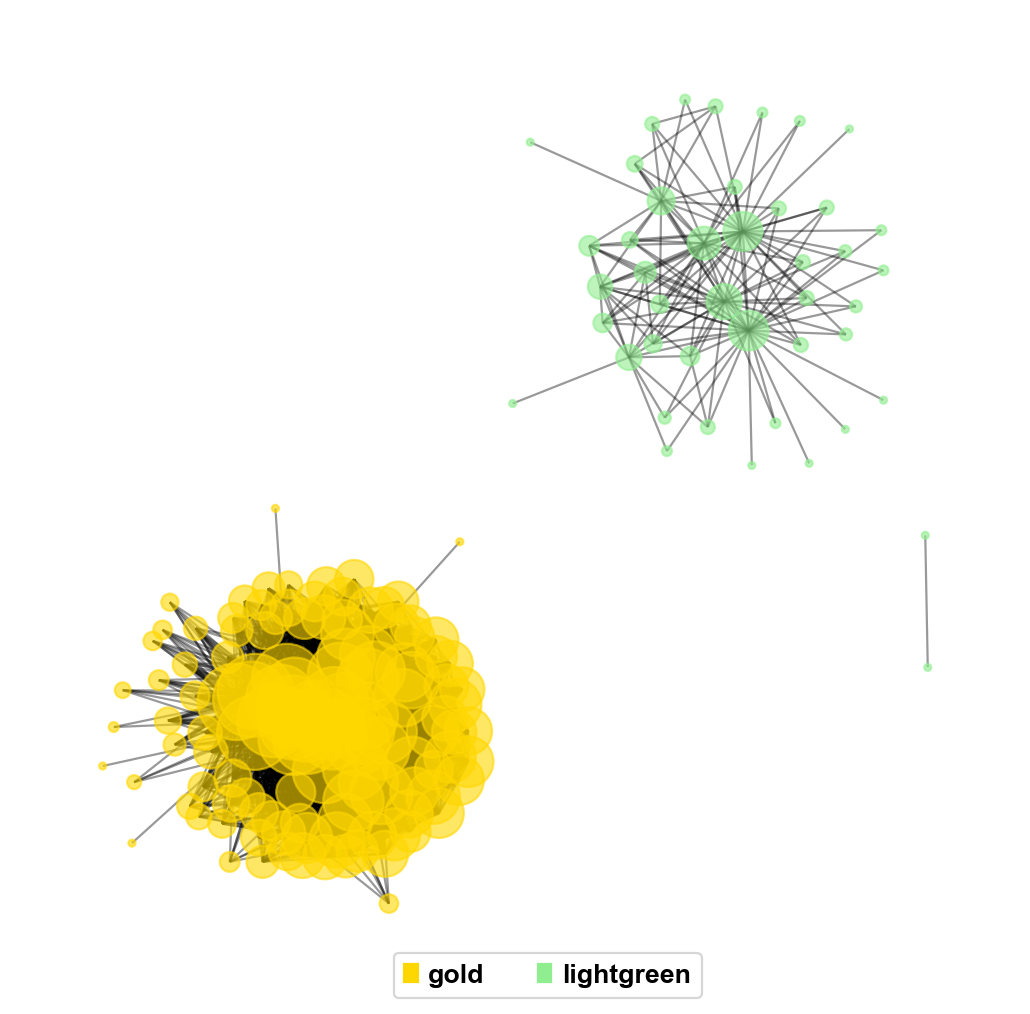

In [19]:
pyWGCNA_5xFAD.plot_sub_network(['gold','lightgreen'],pos_type='kamada_kawai',pos_scale=10,pos_dim=2,
                         figsize=(8,8),node_size=10,label_fontsize=8,correlation_threshold=0.2,
                        label_bbox={"ec": "white", "fc": "white", "alpha": 0.6})

We also can merge two previous steps by calling `runWGCNA()` function.

## Updating sample information and assiging color to them for dowstream analysis

In [3]:
pyWGCNA_5xFAD.updateSampleInfo(path='data/5xFAD_paper/sampleInfo.csv', sep=',')

# add color for metadata
pyWGCNA_5xFAD.setMetadataColor('Sex', {'Female': 'green',
                                       'Male': 'yellow'})
pyWGCNA_5xFAD.setMetadataColor('Genotype', {'5xFADWT': 'darkviolet',
                                            '5xFADHEMI': 'deeppink'})
pyWGCNA_5xFAD.setMetadataColor('Age', {'4mon': 'thistle',
                                       '8mon': 'plum',
                                       '12mon': 'violet',
                                       '18mon': 'purple'})
pyWGCNA_5xFAD.setMetadataColor('Tissue', {'Hippocampus': 'red',
                                          'Cortex': 'blue'})

**note**: For doing downstream analysis, we keep aside the Gray modules which is the collection of genes that could not be assigned to any other module.

## Relating modules to external information and identifying important genes
PyWGCNA gather some important analysis after identifying modules in `analyseWGCNA()` function including:

1. Quantifying module–trait relationship 
2. Gene relationship to trait and modules

Keep in your mind before you start analysis to add any sample or gene information.

For showing module relationship heatmap, PyWGCNA needs user to choose and set colors from [Matplotlib colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for metadata by using `setMetadataColor()` function.

You also can select which data trait in which order you wish to show in module eigengene heatmap

Analysing pyWGCNA...
Calculating module trait relationship ...
	Done..

Adding (signed) eigengene-based connectivity (module membership) ...
	Done..



'Done'

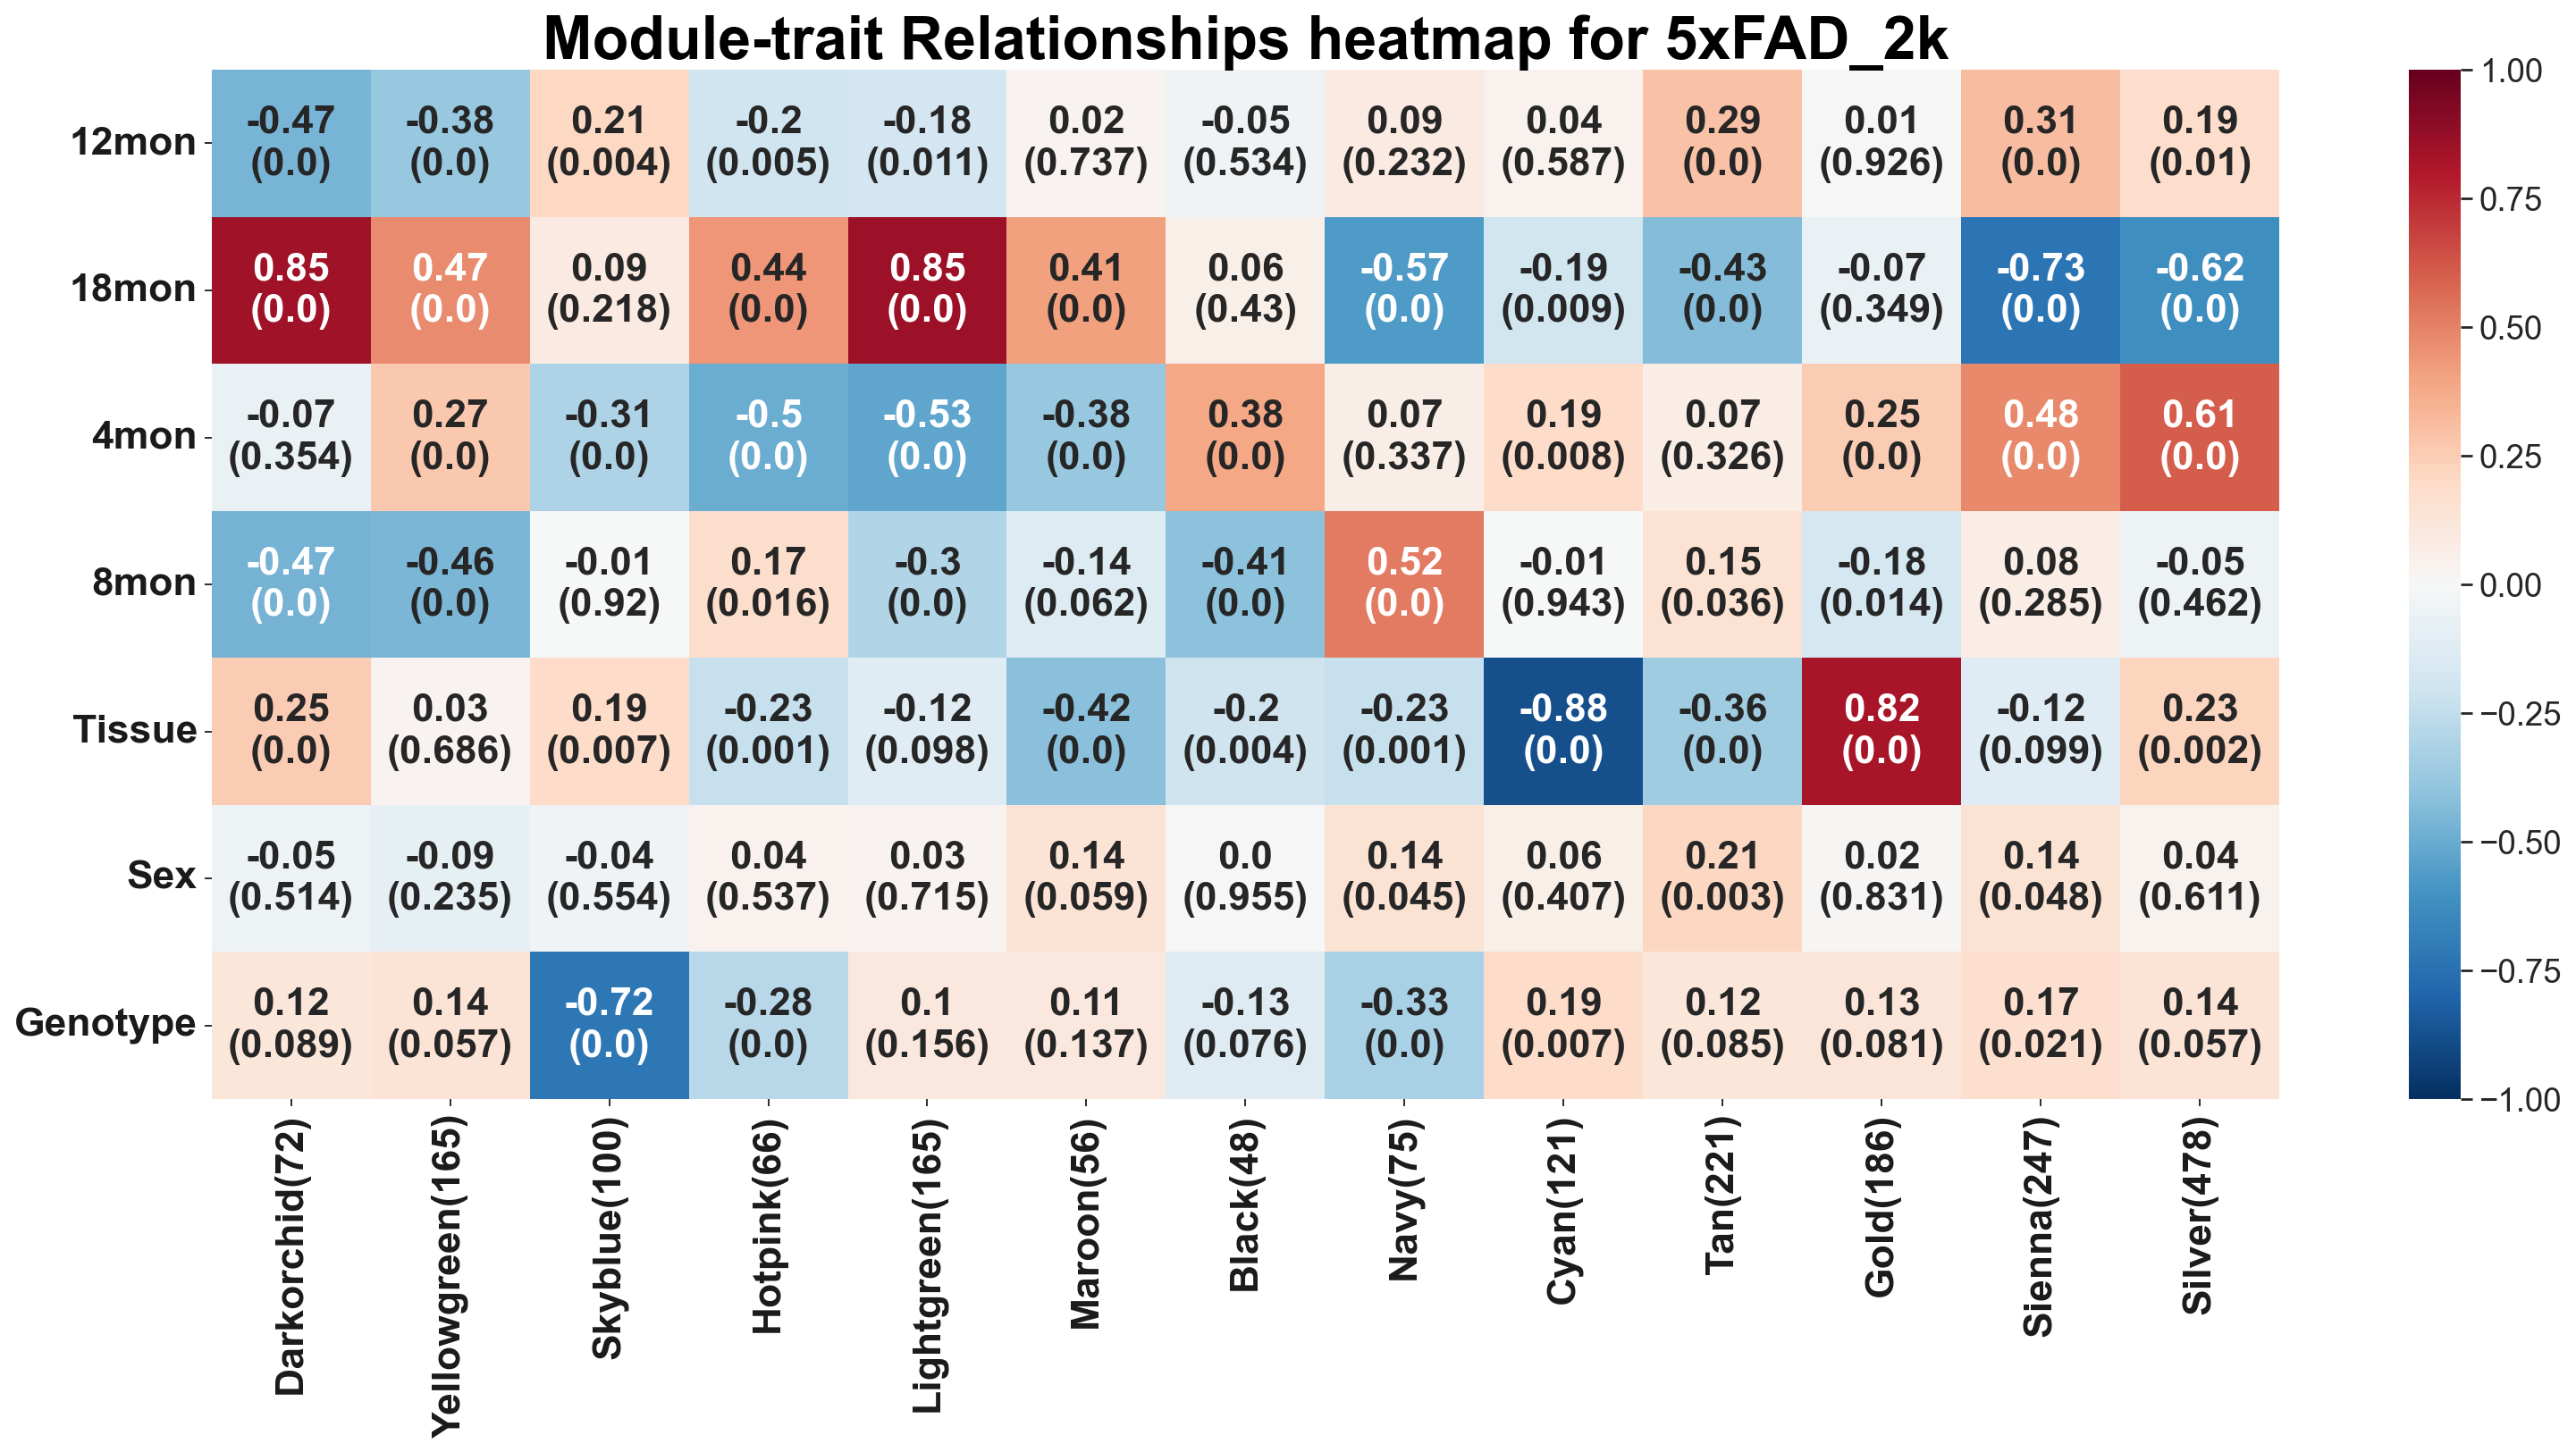

In [4]:
pyWGCNA_5xFAD.analyseWGCNA()

In [5]:
metadata = pyWGCNA_5xFAD.datExpr.obs.columns.tolist()

In [10]:
pyWGCNA_5xFAD.plotModuleEigenGene('lightgreen', metadata, show=True)

array([[<AxesSubplot: title={'center': 'Module Eigengene for lightgreen'}>,
        <AxesSubplot: >],
       [<AxesSubplot: ylabel='eigengeneExp'>, <AxesSubplot: >],
       [<AxesSubplot: xlabel='sample_id'>, <AxesSubplot: >]], dtype=object)

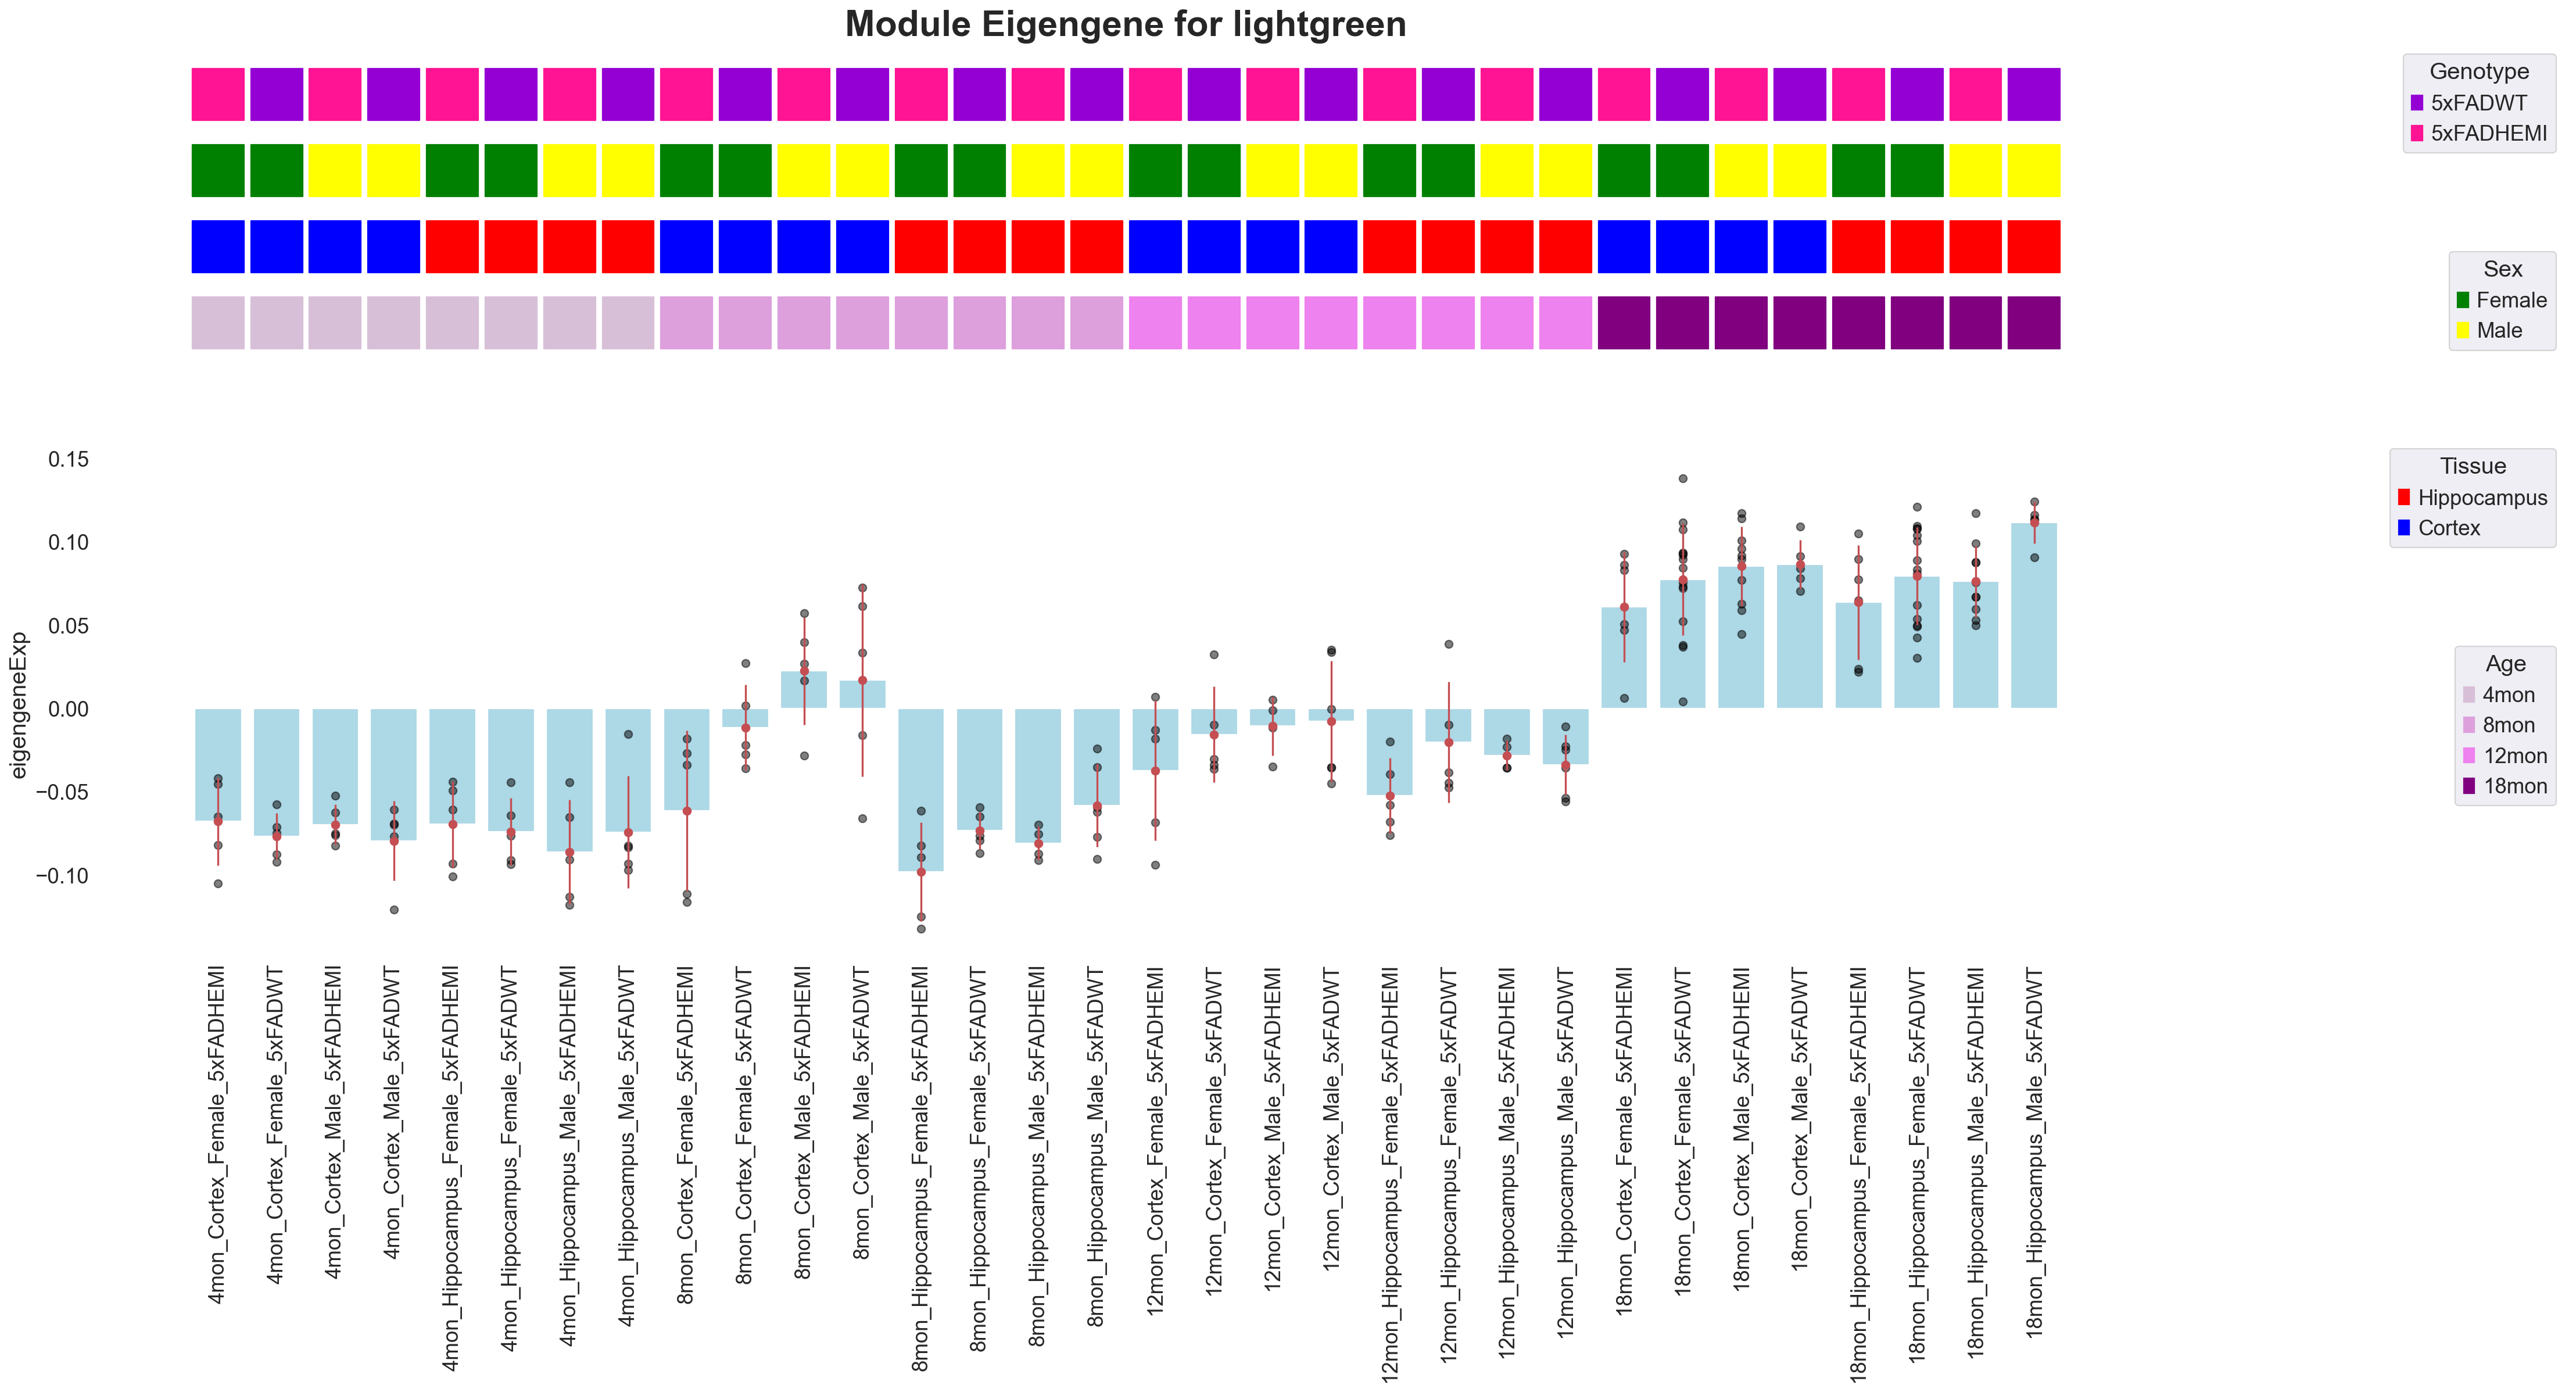

In [11]:
pyWGCNA_5xFAD.barplotModuleEigenGene('lightgreen', metadata, show=True)

## Finding hub genes for each modules

you can also ask about hub genes in each modules based on their connectivity by using `top_n_hub_genes()` function.

It will give you dataframe sorted by connectivity with additional gene information you have in your expression data.

In [12]:
pyWGCNA_5xFAD.top_n_hub_genes(moduleName="lightgreen", n=10)

calculating adjacency matrix ...
	Done..



connectivity dynamicColors moduleColors  moduleLabels
ENSMUSG00000030647     21.795590    lightgreen   lightgreen             5
ENSMUSG00000014313     19.976527    lightgreen   lightgreen             5
ENSMUSG00000017778     19.927416    lightgreen   lightgreen             5
ENSMUSG00000021520     19.277455    lightgreen   lightgreen             5
ENSMUSG00000039221     18.339987    lightgreen   lightgreen             5
ENSMUSG00000078784     18.180421    lightgreen   lightgreen             5
ENSMUSG00000045996     18.124036    lightgreen   lightgreen             5
ENSMUSG00000052033     16.840824    lightgreen   lightgreen             5
ENSMUSG00000071528     16.746133    lightgreen   lightgreen             5
ENSMUSG00000026154     16.186290    lightgreen   lightgreen             5